In [1]:
import pickle
import torch
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 128-channel system

In [2]:
df = pd.read_csv("data/EEG_ImageNet/ch_name.csv")
ch_name_list = df["ch_name"].tolist()

In [3]:
path = "data/EEG_ImageNet/original/eeg_5_95_std.pth"

data = np.array(torch.load(path)["dataset"][0]["eeg"], dtype = np.float32)
data.shape

(128, 500)

In [4]:
info = mne.create_info(ch_name_list, 1000, ch_types = "eeg")
montage = mne.channels.make_standard_montage('standard_1005')
pos = montage.get_positions()
channels_to_remove = [ch for ch in pos["ch_pos"] if ch not in ch_name_list]

for ch in channels_to_remove:
    del pos["ch_pos"][ch]

In [5]:
pos

{'ch_pos': OrderedDict([('Fp1', array([-0.0294367,  0.0839171, -0.00699  ])),
              ('Fpz', array([ 0.0001123,  0.088247 , -0.001713 ])),
              ('Fp2', array([ 0.0298723,  0.0848959, -0.00708  ])),
              ('AF7', array([-0.0548397,  0.0685722, -0.01059  ])),
              ('AF3', array([-0.0337007,  0.0768371,  0.021227 ])),
              ('AF4', array([0.0357123, 0.0777259, 0.021956 ])),
              ('AF8', array([ 0.0557433,  0.0696568, -0.010755 ])),
              ('F9', array([-0.0701019,  0.0416523, -0.049952 ])),
              ('F7', array([-0.0702629,  0.0424743, -0.01142  ])),
              ('F5', array([-0.0644658,  0.0480353,  0.016921 ])),
              ('F3', array([-0.0502438,  0.0531112,  0.042192 ])),
              ('F1', array([-0.0274958,  0.0569311,  0.060342 ])),
              ('Fz', array([0.0003122, 0.058512 , 0.066462 ])),
              ('F2', array([0.0295142, 0.0576019, 0.05954  ])),
              ('F4', array([0.0518362, 0.0543048, 0.04

In [6]:
new_montage = mne.channels.make_dig_montage(
    ch_pos = pos["ch_pos"],
    lpa = pos["lpa"],
    rpa = pos["rpa"],
    hsp = pos["hsp"],
    hpi = pos["hpi"],
    coord_frame = pos["coord_frame"],
    nasion = pos["nasion"]
)

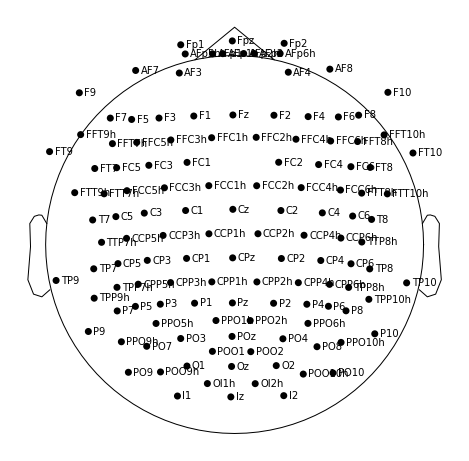

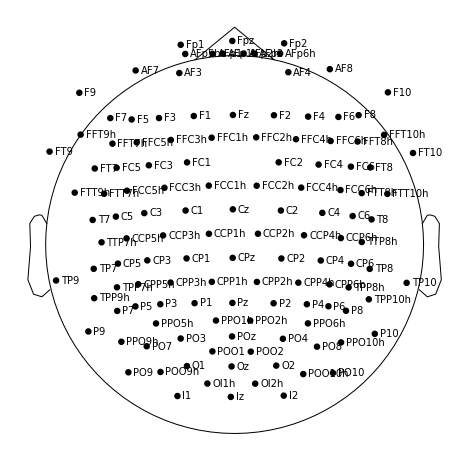

In [7]:
new_montage.plot()

In [8]:
with open("data/Montage/128_ch_system.pkl", 'wb') as f:
    pickle.dump(new_montage, f)

In [9]:
evoked = mne.EvokedArray(data, info)
evoked.set_montage(new_montage)

Condition,
Data kind,average
Timepoints,500 samples
Channels,128 channels
Number of averaged epochs,1
Time range (secs),0.0 – 0.499
Baseline (secs),off


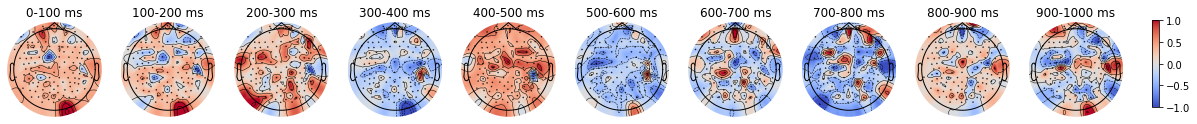

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for i in range(10):
    tmp_data = evoked.data[:, i*25:(i+1)*25]
    topo_data = np.mean(tmp_data, axis=1)
    topo_data = (topo_data - np.mean(topo_data)) / np.std(topo_data)
    topo_data = 2 * (topo_data - np.min(topo_data)) / (np.max(topo_data) - np.min(topo_data)) - 1
    im, cn = mne.viz.plot_topomap(topo_data, evoked.info, show=False, cmap = 'coolwarm', sensors=True, res = 1000, axes=axs[i], size=1)
    axs[i].set_title('%d-%d ms' % (i*100, (i+1)*100))
cax = fig.add_axes([0.92, 0.33, 0.005, 0.4])
fig.colorbar(im, cax=cax)

## 8-channel system

In [12]:
ch_name_list = ["Fp1", "Fp2", "Fz", "T7", "T8", "Pz", "O1", "O2"]

info = mne.create_info(ch_name_list, 1000, ch_types = "eeg")
montage = mne.channels.make_standard_montage('biosemi32')
pos = montage.get_positions()
channels_to_remove = [ch for ch in pos["ch_pos"] if ch not in ch_name_list]

for ch in channels_to_remove:
    del pos["ch_pos"][ch]

In [13]:
pos

{'ch_pos': OrderedDict([('Fp1',
               array([-0.02933873,  0.09029533, -0.00331545])),
              ('T7', array([-0.09494213, -0.        , -0.00331545])),
              ('Pz',
               array([ 4.18445162e-18, -6.83372810e-02,  6.59925452e-02])),
              ('O1', array([-0.02933873, -0.09029533, -0.00331545])),
              ('O2', array([ 0.02933873, -0.09029533, -0.00331545])),
              ('T8', array([ 0.09494213,  0.        , -0.00331545])),
              ('Fp2', array([ 0.02933873,  0.09029533, -0.00331545])),
              ('Fz',
               array([4.18445162e-18, 6.83372810e-02, 6.59925452e-02]))]),
 'coord_frame': 'unknown',
 'nasion': array([ 5.27205792e-18,  8.60992398e-02, -4.01487349e-02]),
 'lpa': array([-0.08609924, -0.        , -0.04014873]),
 'rpa': array([ 0.08609924,  0.        , -0.04014873]),
 'hsp': None,
 'hpi': None}

In [14]:
new_montage = mne.channels.make_dig_montage(
    ch_pos = pos["ch_pos"],
    lpa = pos["lpa"],
    rpa = pos["rpa"],
    hsp = pos["hsp"],
    hpi = pos["hpi"],
    coord_frame = pos["coord_frame"],
    nasion = pos["nasion"]
)

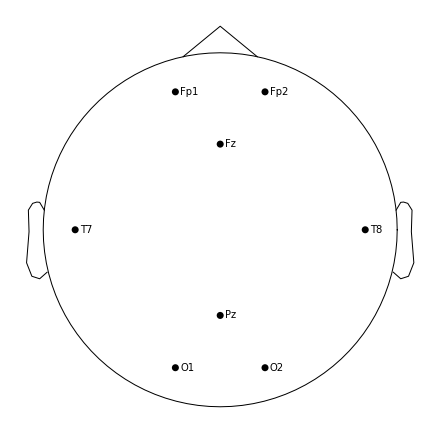

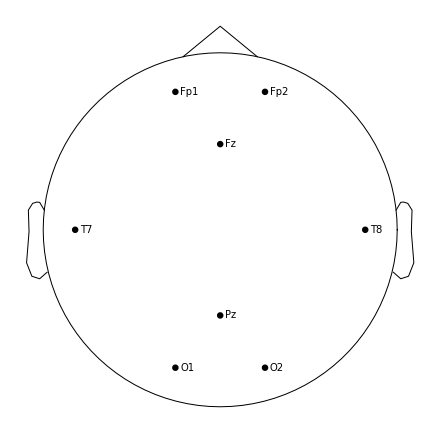

In [16]:
new_montage.plot()

In [17]:
with open("data/Montage/8_ch_system.pkl", 'wb') as f:
    pickle.dump(new_montage, f)

In [18]:
sample = np.concatenate(
    [data[i, :].reshape(1, -1) for i in [0, 2, 12, 28, 36, 53, 66, 68]],
    axis = 0
)

evoked = mne.EvokedArray(sample, info)
evoked.set_montage(new_montage)

Condition,
Data kind,average
Timepoints,500 samples
Channels,8 channels
Number of averaged epochs,1
Time range (secs),0.0 – 0.499
Baseline (secs),off


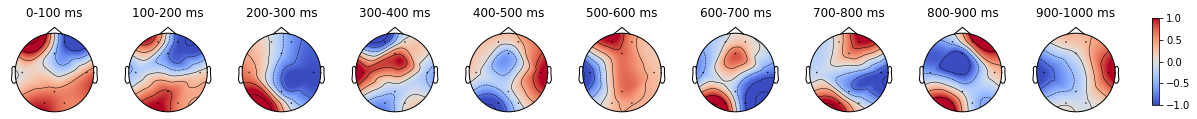

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for i in range(10):
    tmp_data = evoked.data[:, i*25:(i+1)*25]
    topo_data = np.mean(tmp_data, axis=1)
    topo_data = (topo_data - np.mean(topo_data)) / np.std(topo_data)
    topo_data = 2 * (topo_data - np.min(topo_data)) / (np.max(topo_data) - np.min(topo_data)) - 1
    im, cn = mne.viz.plot_topomap(topo_data, evoked.info, show=False, cmap = 'coolwarm', sensors=True, res = 1000, axes=axs[i], size=1)
    axs[i].set_title('%d-%d ms' % (i*100, (i+1)*100))
cax = fig.add_axes([0.92, 0.33, 0.005, 0.4])
fig.colorbar(im, cax=cax)